In [79]:
#Імпорт необхідних бібліотек
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as ppl
import seaborn as sbn
import tensorflow as tf
import torch as tch

from sklearn.datasets import make_regression as mkr
from sklearn.datasets import make_classification as mkc
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import roc_curve as rcv
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix as cnm
from tensorflow import keras as ks
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential as sql
from tensorflow.keras.layers import Dense as dn

In [80]:
#Частина 1
tens_scal = tf.constant(13)
tens_vect = tf.Variable([3, 13, 23, 33, 43, 53, 63, 73, 83, 93])
tens_mat1 = tf.constant([[13, 33],[33, 23]])
arr_matr2 = nmp.arange(12, 20, step=2 , dtype=nmp.int32)
tens_mat2 = tf.constant(arr_matr2, shape=(2, 2))
tens_tens1 = tf.constant([[[13, 23, 33], [43, 53, 63]], [[73, 83, 93], [33, 63, 93]]])
tens_tens2 = tch.randint(2, 34, (2, 2, 3))
#Вивід тензорів
print("\nScalar:\n ", tens_scal)
print("\nVector:\n ", tens_vect)
print("\nMatrix 1:\n ", tens_mat1)
print("\nMatrix 2:\n ", tens_mat2)
print("\nTensor 1:\n ", tens_tens1)
print("\nTensor 2:\n ", tens_tens2)
#Вивід операцій
print("\nSum:\n ", tf.add(tens_tens1, tens_tens2))
print("\nDifference:\n ", tf.subtract(tens_tens1, tens_tens2))
print("\nMultiplication:\n ", tf.multiply(tens_tens1, tens_tens2))
print("\nDivision:\n ", tf.divide(tens_tens1, tens_tens2))
print("\nMatrix multiplication:\n ", tf.matmul(tens_mat1, tens_mat2))
print("\nSine function:\n ", tf.sin(tf.divide(tens_tens1, tens_tens2)))
print("\nCosine function:\n ", tf.cos(tf.divide(tens_tens1, tens_tens2)))
print("\nValue of (1;2) element:\n ", tens_mat2[0][1])
print("\nVector slice:\n ", tens_vect[-3:])
print("\nReshaped tensor 1:\n ", tf.reshape(tens_tens1, shape=(1, 12)))
print("\nReshaped tensor 2:\n ", tf.reshape(tens_tens2, shape=(1, 12)))


Scalar:
  tf.Tensor(13, shape=(), dtype=int32)

Vector:
  <tf.Variable 'Variable:0' shape=(10,) dtype=int32, numpy=array([ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93])>

Matrix 1:
  tf.Tensor(
[[13 33]
 [33 23]], shape=(2, 2), dtype=int32)

Matrix 2:
  tf.Tensor(
[[12 14]
 [16 18]], shape=(2, 2), dtype=int32)

Tensor 1:
  tf.Tensor(
[[[13 23 33]
  [43 53 63]]

 [[73 83 93]
  [33 63 93]]], shape=(2, 2, 3), dtype=int32)

Tensor 2:
  tensor([[[28, 14, 25],
         [ 5, 16, 26]],

        [[ 2, 16, 14],
         [ 4, 18,  2]]])

Sum:
  tf.Tensor(
[[[ 41  37  58]
  [ 48  69  89]]

 [[ 75  99 107]
  [ 37  81  95]]], shape=(2, 2, 3), dtype=int32)

Difference:
  tf.Tensor(
[[[-15   9   8]
  [ 38  37  37]]

 [[ 71  67  79]
  [ 29  45  91]]], shape=(2, 2, 3), dtype=int32)

Multiplication:
  tf.Tensor(
[[[ 364  322  825]
  [ 215  848 1638]]

 [[ 146 1328 1302]
  [ 132 1134  186]]], shape=(2, 2, 3), dtype=int32)

Division:
  tf.Tensor(
[[[ 0.46428571  1.64285714  1.32      ]
  [ 8.6         3.3125   

7/7 [==============================] - 0s 2ms/step
Loss on training data:
 [47.760807037353516, 47.760807037353516]
Loss on test data:
 [47.823753356933594, 47.823753356933594]


c:\Users\Bogdan\anaconda3\envs\ml2023\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


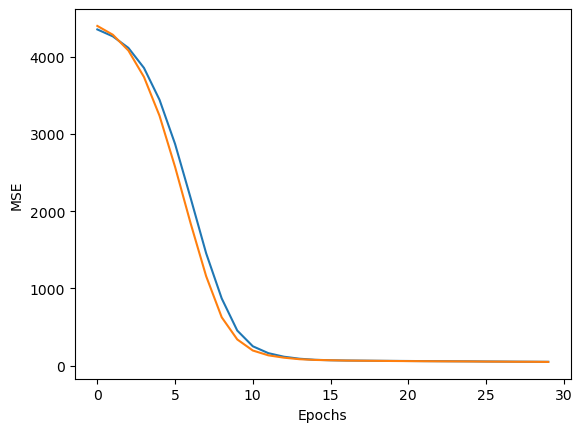

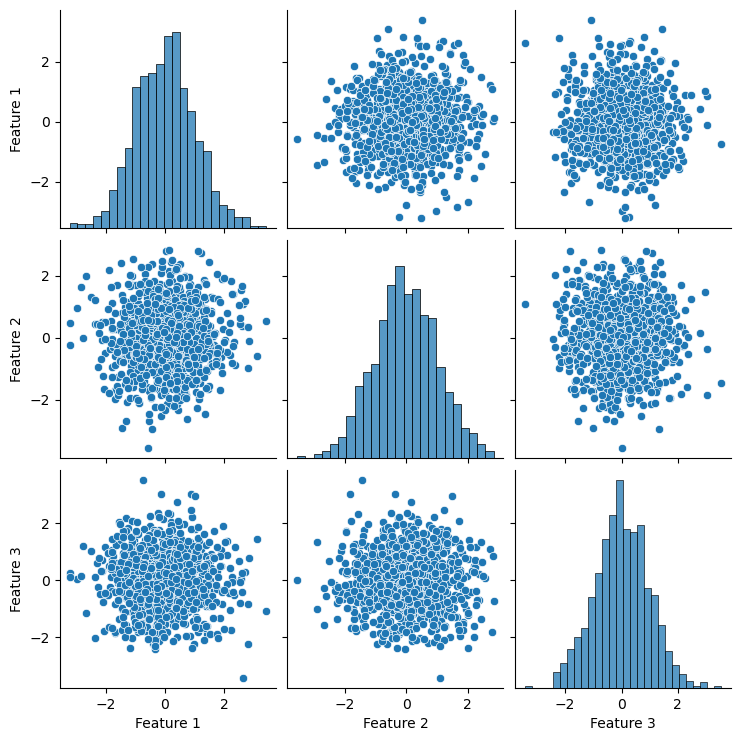

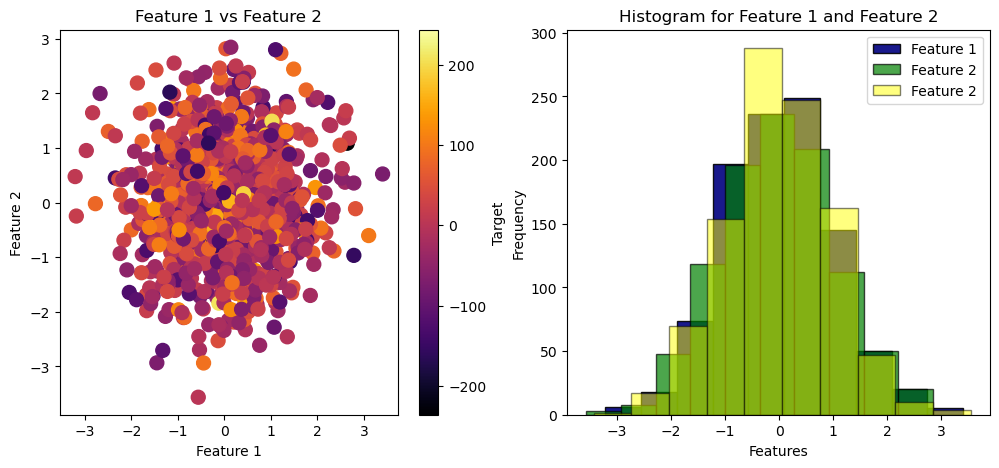

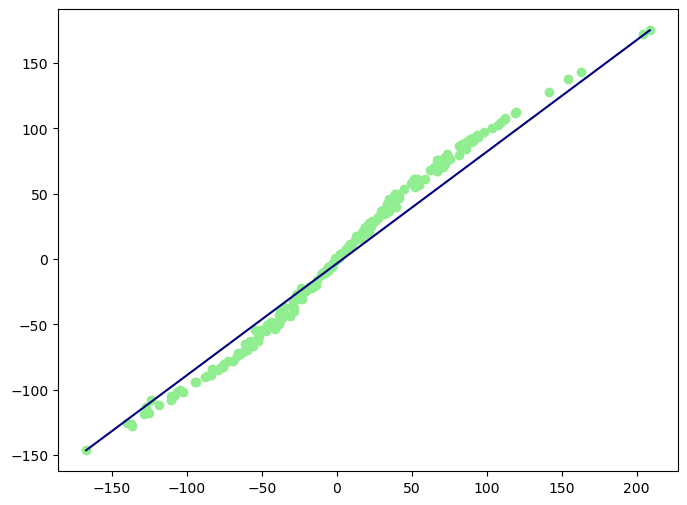

In [81]:
#Частина 2a
x, y = mkr(n_samples=1000, n_features=3, n_informative=1, noise=0.1, random_state=13)
dat = pnd.DataFrame(x, columns = [f"Feature {i+1}" for i in range(3)])
dat['Target'] = y
dat.to_csv('Part2a.csv', index=False)
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=13)
md = sql([dn(64, activation='relu', input_shape=(x.shape[1],)), dn(32, activation='relu'), dn(1)])
md.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
h = md.fit(xtrain, ytrain, epochs=30, validation_data=(xtest, ytest), verbose=0)
pred = md.predict(xtest)
#Оцінка моделі 
print("Loss on training data:\n", md.evaluate(xtrain, ytrain, verbose=0))
print("Loss on test data:\n", md.evaluate(xtest, ytest, verbose=0))
#Візуалізація
ppl.plot(h.history['loss'], label='Train loss')
ppl.plot(h.history['val_loss'], label='Validation loss')
ppl.xlabel('Epochs')
ppl.ylabel('MSE')
sbn.pairplot(dat[['Feature 1', 'Feature 2', 'Feature 3']])
ppl.figure(figsize=(12, 5))
ppl.subplot(1, 2, 1)
ppl.scatter(dat['Feature 1'], dat['Feature 2'], c=dat['Target'], cmap='inferno', s=100)
ppl.colorbar(label='Target')
ppl.xlabel('Feature 1')
ppl.ylabel('Feature 2')
ppl.title('Feature 1 vs Feature 2')
ppl.subplot(1, 2, 2)
ppl.hist(dat['Feature 1'], bins=10, color='navy', alpha=0.9, edgecolor='black', label='Feature 1')
ppl.hist(dat['Feature 2'], bins=10, color='green', alpha=0.7, edgecolor='black', label='Feature 2')
ppl.hist(dat['Feature 3'], bins=10, color='yellow', alpha=0.5, edgecolor='black', label='Feature 2')
ppl.xlabel('Features')
ppl.ylabel('Frequency')
ppl.title('Histogram for Feature 1 and Feature 2')
ppl.legend()
ppl.figure(figsize=(8, 6))
ppl.scatter(ytest, pred, color='lightgreen')
ppl.plot([min(ytest), max(ytest)], [min(pred), max(pred)], linestyle='-', color='navy')
ppl.show(close=None, block=None)

7/7 [==============================] - 0s 1ms/step
Accuracy:  0.975
Loss on training data:
 [0.08246973901987076, 0.9750000238418579]
Loss on test data:
 [0.09656927734613419, 0.9750000238418579]


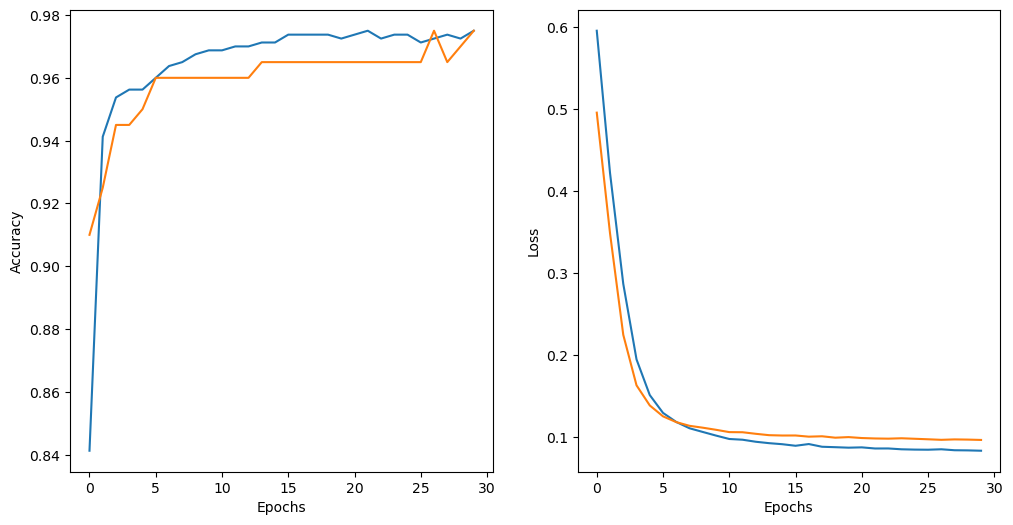

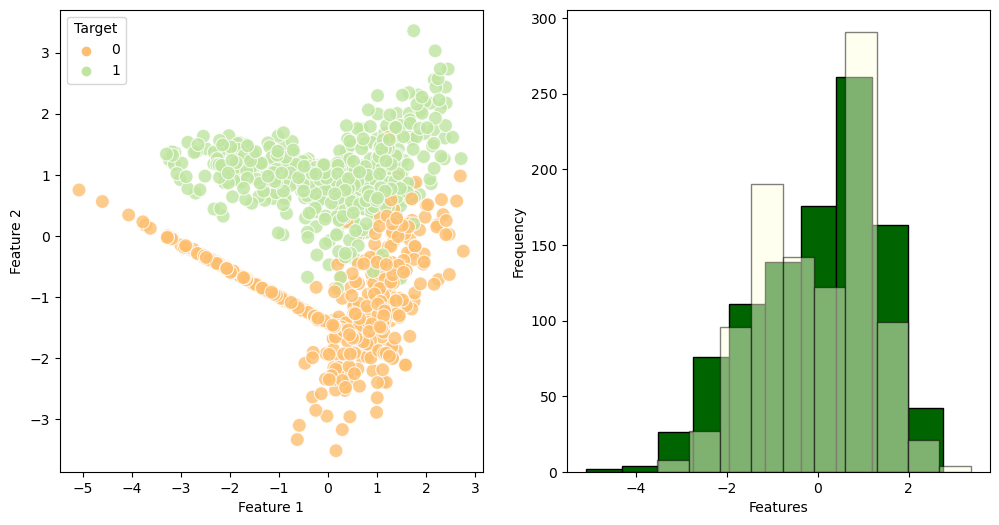

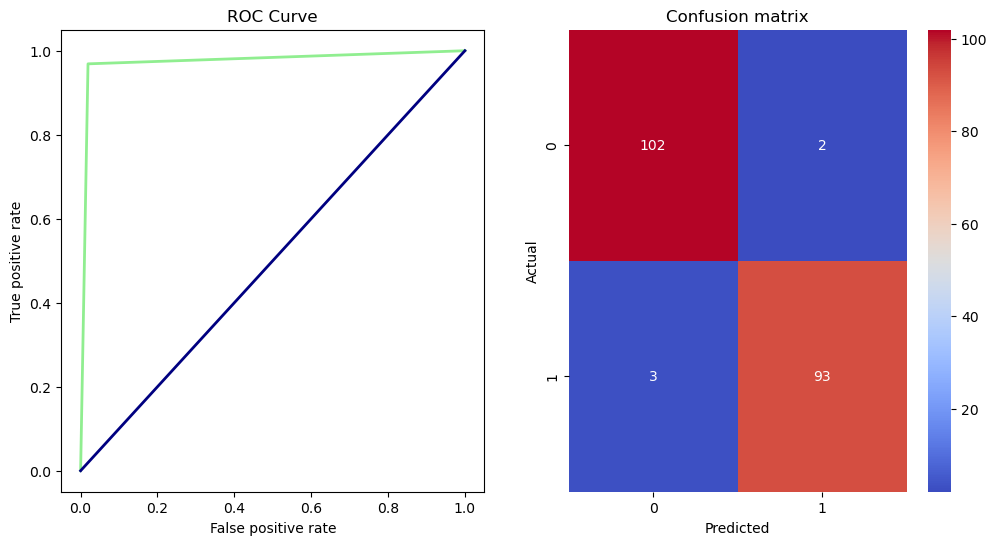

In [82]:
#Частина 2b
x, y = mkc(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=13)
data = pnd.DataFrame(x, columns = [f"Feature {i+1}" for i in range(2)])
data['Target'] = y
data.to_csv('Part2b.csv', index=False)
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=13)
md = sql([dn(64, activation='relu', input_shape=(x.shape[1],)), dn(32, activation='relu'), dn(1, activation='sigmoid')])
md.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h = md.fit(xtrain, ytrain, epochs=30, validation_data=(xtest, ytest), verbose=0)
pred = (md.predict(xtest) > 0.5).astype("int32")
#Оцінка моделі 
print('Accuracy: ', acs(ytest, pred))
print("Loss on training data:\n", md.evaluate(xtrain, ytrain, verbose=0))
print("Loss on test data:\n", md.evaluate(xtest, ytest, verbose=0))
#Візуалізація
ppl.figure(figsize=(12, 6))
ppl.subplot(1, 2, 1)
ppl.plot(h.history['accuracy'], label='Train accuracy')
ppl.plot(h.history['val_accuracy'], label='Validation accuracy')
ppl.xlabel('Epochs')
ppl.ylabel('Accuracy')
ppl.subplot(1, 2, 2)
ppl.plot(h.history['loss'], label='Train loss')
ppl.plot(h.history['val_loss'], label='Validation loss')
ppl.xlabel('Epochs')
ppl.ylabel('Loss')
ppl.show()
ppl.figure(figsize=(12, 6))
ppl.subplot(1, 2, 1)
sbn.scatterplot(x=data['Feature 1'], y=data['Feature 2'], hue=data['Target'], palette='Spectral', s=100, alpha=0.8)
ppl.xlabel('Feature 1')
ppl.ylabel('Feature 2')
ppl.subplot(1, 2, 2)
ppl.hist(data['Feature 1'], bins=10, color='darkgreen', edgecolor='black', label='Feature 1')
ppl.hist(data['Feature 2'], bins=10, color='lightyellow', alpha=0.5, edgecolor='black', label='Feature 2')
ppl.xlabel('Features')
ppl.ylabel('Frequency')
ppl.show()
ppl.figure(figsize=(12, 6))
ppl.subplot(1, 2, 1)
f, t, th = rcv(ytest, pred)
ra = auc(f, t)
ppl.title('ROC Curve')
ppl.xlabel('False positive rate')
ppl.ylabel('True positive rate')
ppl.plot(f, t, color='lightgreen', lw=2, label=f'ROC curve (area = {ra:.2f})')
ppl.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-')
ppl.subplot(1, 2, 2)
sbn.heatmap(cnm(ytest, pred), annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
ppl.xlabel('Predicted')
ppl.ylabel('Actual')
ppl.title('Confusion matrix')
ppl.show(close=None, block=None)